### Data Preprocessing

Importing dependencies

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import joblib

Loading data

In [3]:
apple_df = pd.read_csv(r'D:\Capstone Projects\StockerLens\data\interim\stock data\apple.csv')
amazon_df = pd.read_csv(r'D:\Capstone Projects\StockerLens\data\interim\stock data\amazon.csv')
microsoft_df = pd.read_csv(r'D:\Capstone Projects\StockerLens\data\interim\stock data\microsoft.csv')

In [4]:
amazon_df.head()

,date,Close,High,Low,Open,Volume,normalized
0,2019-01-02,76.956497,77.667999,73.046501,73.260002,159662000,0.484132
1,2019-01-03,75.014000,76.900002,74.855499,76.000504,139512000,0.584894
2,2019-01-04,78.769501,79.699997,75.915497,76.500000,183652000,0.547287
3,2019-01-07,81.475502,81.727997,79.459503,80.115501,159864000,0.611834
4,2019-01-08,82.829002,83.830498,80.830498,83.234497,177628000,0.595282


In [5]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1549 non-null   object 
 1   Close       1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Open        1549 non-null   float64
 5   Volume      1549 non-null   int64  
 6   normalized  1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 84.8+ KB


This stock price data is a countinous and sequence data, Outlier handling will lose some variations in the data so it is omitted.

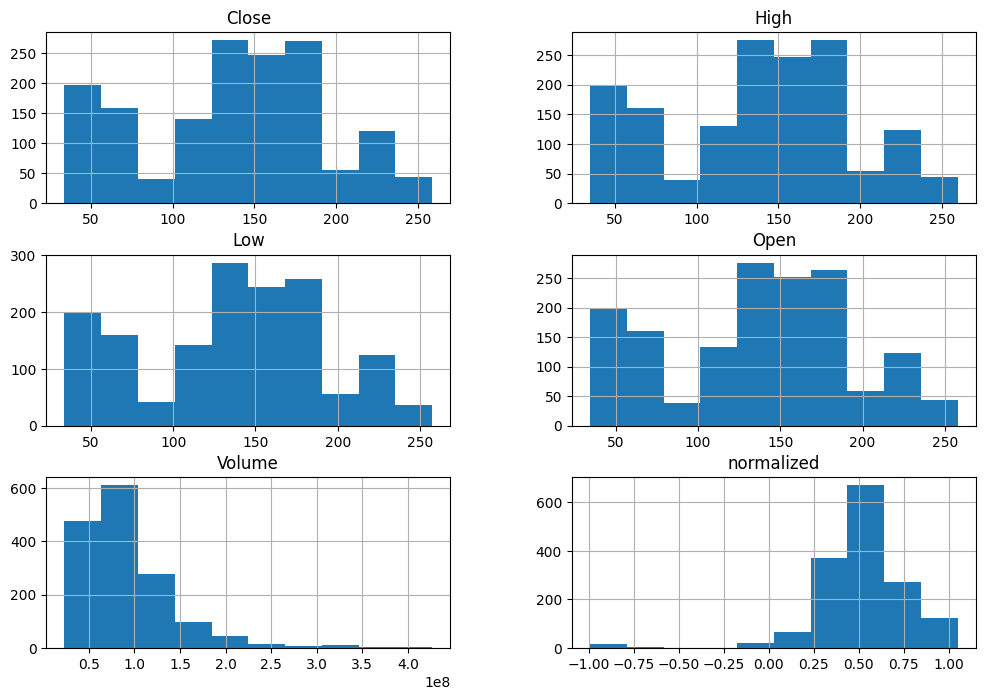

In [6]:
apple_df.hist(figsize=(12,8))
plt.show()

#### Standardization

In [7]:
apple_df.head()

,date,Close,High,Low,Open,Volume,normalized
0,2019-01-02,37.667191,37.889017,36.787049,36.944473,148158800,0.408963
1,2019-01-03,33.915249,34.757226,33.869929,34.342199,365248800,0.979500
2,2019-01-04,35.363071,35.432244,34.299271,34.473390,234428400,0.501658
3,2019-01-07,35.284363,35.499034,34.800166,35.468025,219111200,0.487303
4,2019-01-08,35.956997,36.212216,35.425097,35.673157,164101200,0.422461


In [8]:
from sklearn.preprocessing import StandardScaler

apple_df.drop('date', axis=1, inplace=True)

apple_scaler = StandardScaler()

apple_df = pd.DataFrame(apple_scaler.fit_transform(apple_df), columns=apple_df.columns)
apple_df['Target'] = apple_df['Close'].shift(-1)
joblib.dump(apple_scaler,r'D:\Capstone Projects\StockerLens\artifacts\preprocessors\stock price\apple_scaler.pkl')

apple_df.head()

,Close,High,Low,Open,Volume,normalized,Target
0,-1.792875,-1.799705,-1.797421,-1.804975,1.055612,-0.397945,-1.860126
1,-1.860126,-1.855415,-1.850187,-1.851665,5.220080,1.793896,-1.834175
2,-1.834175,-1.843408,-1.842421,-1.849311,2.710534,-0.041838,-1.835586
3,-1.835586,-1.842220,-1.833361,-1.831466,2.416702,-0.096986,-1.823529
4,-1.823529,-1.829533,-1.822057,-1.827785,1.361438,-0.346092,-1.812585


In [9]:
amazon_df.drop('date', axis=1, inplace=True)
amazon_scaler = StandardScaler()
amazon_df = pd.DataFrame(amazon_scaler.fit_transform(amazon_df), columns=amazon_df.columns)
amazon_df['Target'] = amazon_df['Close'].shift(-1)
joblib.dump(amazon_scaler,r'D:\Capstone Projects\StockerLens\artifacts\preprocessors\stock price\amazon_scaler.pkl')

amazon_df.head()

,Close,High,Low,Open,Volume,normalized,Target
0,-1.623931,-1.633371,-1.695754,-1.717882,2.670672,-0.930793,-1.674433
1,-1.674433,-1.653157,-1.648303,-1.646751,2.076226,-0.339113,-1.576797
2,-1.576797,-1.581022,-1.620498,-1.633786,3.378401,-0.559946,-1.506445
3,-1.506445,-1.528777,-1.527535,-1.539943,2.676631,-0.180921,-1.471257
4,-1.471257,-1.474612,-1.491573,-1.458987,3.200687,-0.278113,-1.467565


In [10]:
microsoft_df.drop('date', axis=1, inplace=True)
microsoft_scaler = StandardScaler()
microsoft_df = pd.DataFrame(microsoft_scaler.fit_transform(microsoft_df), columns=microsoft_df.columns)
microsoft_df['Target'] = microsoft_df['Close'].shift(-1)
joblib.dump(microsoft_scaler,r'D:\Capstone Projects\StockerLens\artifacts\preprocessors\stock price\microsoft_scaler.pkl')
microsoft_df.head()

,Close,High,Low,Open,Volume,normalized,Target
0,-1.718818,-1.726129,-1.724809,-1.732337,0.621498,0.619273,-1.754230
1,-1.754230,-1.740878,-1.741497,-1.727104,1.222681,0.771678,-1.711108
2,-1.711108,-1.718943,-1.724905,-1.730719,1.345533,0.977160,-1.709870
3,-1.709870,-1.711758,-1.705243,-1.712450,0.648598,0.616544,-1.702826
4,-1.702826,-1.705140,-1.698242,-1.699130,0.305152,0.433547,-1.688833


In [11]:
apple_df.to_csv(r'D:\Capstone Projects\StockerLens\data\processed\stock data\apple.csv', index=False)
amazon_df.to_csv(r'D:\Capstone Projects\StockerLens\data\processed\stock data\amazon.csv', index=False)
microsoft_df.to_csv(r'D:\Capstone Projects\StockerLens\data\processed\stock data\microsoft.csv', index=False)